In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
from sklearn.linear_model import LinearRegression

Задача 1 Даны значения величины заработной платы заемщиков банка (zp) и значения их
поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические
операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату
(то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая
переменная). Произвести расчет как с использованием intercept, так и без.

In [3]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])



In [4]:
model = LinearRegression()
zp_matrix = zp.reshape(-1, 1)


In [5]:
model.fit(zp_matrix, ks)
b0 = model.intercept_
b1 = model.coef_
b0, b1

(444.17735732435943, array([2.62053888]))

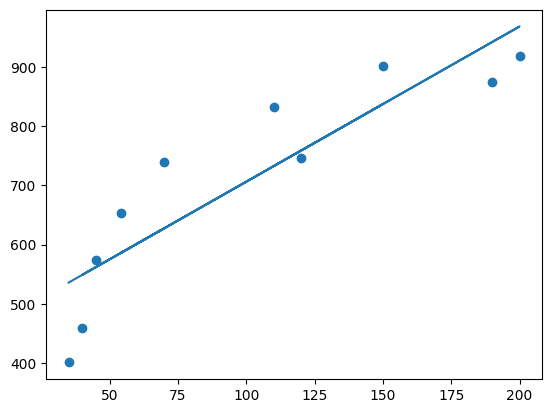

In [6]:
plt.scatter(zp, ks)
plt.plot(zp, b0+b1*zp)
plt.show()

Задача 2 Посчитать коэффициент линейной регрессии при заработной плате (zp), используя
градиентный спуск (без intercept).

In [7]:
B1 = 0
B0 = 0
alfa = pow(10, -8)
n = 10

def mse(B1, x, y, n = 10):
    return ((B1*x - y)**2).sum()/n

# B1 (t + 1) = B1 (t) - альфа * ошибка * x

for i in range(10):
    B1 -= alfa * 2*np.sum(B1*zp-ks/n*zp)
   
    print(f'B1: {B1}\tmse{mse(B1, zp, ks)}')





B1: 0.001622834	mse534163.5772627632
B1: 0.00324563508892648	mse533900.332427341
B1: 0.004868403267446877	mse533637.1654892111
B1: 0.006491138536228612	mse533374.0764438506
B1: 0.008113840895939098	mse533111.0652867372
B1: 0.009736510347245729	mse532848.1320133479
B1: 0.011359146890815887	mse532585.2766191615
B1: 0.01298175052731694	mse532322.4990996557
B1: 0.014604321257416246	mse532059.7994503088
B1: 0.016226859081781148	mse531797.1776665993


Задача 3 (Дополнительно) Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что
изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно
влиять на изменение другого во время одной итерации).

In [8]:
B1 = 0
B0 = 0
alfa = pow(10, -8)
n = 10

def mse(B1, x, y, n = 10):
    return ((B1*x - y)**2).sum()/n

# B1 (t + 1) = B1 (t) - альфа * ошибка * x
# B0 (t + 1) = B0 (t) - альфа * ошибка
for i in range(10):
    B1 -= alfa * 2*np.sum(B1*zp-ks/n*zp)
    B0 -= alfa * 2*np.sum(B0*zp-ks/n)
    print(f'B1: {B1}\tBO: {B0}\tmse: {mse(B1, zp, ks)}')

B1: 0.001622834	BO: 1.4198000000000002e-05	mse: 534163.5772627632
B1: 0.00324563508892648	BO: 2.8395712064560004e-05	mse: 533900.332427341
B1: 0.004868403267446877	BO: 4.259313619951933e-05	mse: 533637.1654892111
B1: 0.006491138536228612	BO: 5.6790272410717204e-05	mse: 533374.0764438506
B1: 0.008113840895939098	BO: 7.098712070399272e-05	mse: 533111.0652867372
B1: 0.009736510347245729	BO: 8.518368108518485e-05	mse: 532848.1320133479
B1: 0.011359146890815887	BO: 9.937995356013244e-05	mse: 532585.2766191615
B1: 0.01298175052731694	BO: 0.00011357593813467424	mse: 532322.4990996557
B1: 0.014604321257416246	BO: 0.00012777163481464887	mse: 532059.7994503088
B1: 0.016226859081781148	BO: 0.00014196704360589483	mse: 531797.1776665993
